# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [7]:
online_rt = pd.read_csv("Online_Retail.csv",encoding = 'latin1')

### Step 3. Assign it to a variable called online_rt

In [8]:
online_rt=pd.DataFrame(online_rt)
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

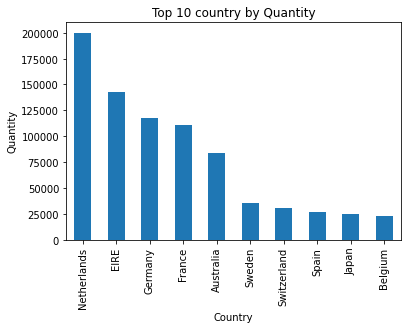

In [22]:
top10=online_rt.groupby('Country').sum()
top10=top10.sort_values(by='Quantity',ascending=False)[1:11]
top10['Quantity'].plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Top 10 country by Quantity')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [33]:
online_rt_postv=online_rt[online_rt.Quantity>0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

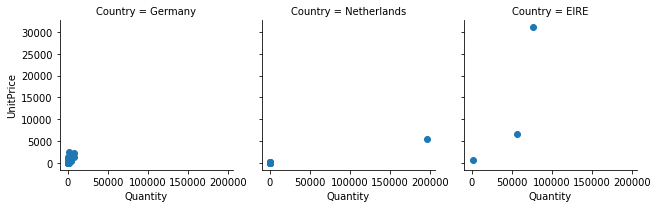

In [36]:
c_id=online_rt.groupby(['CustomerID','Country']).sum()
c_id=c_id[c_id.Quantity>0]
c_id['Country']=c_id.index.get_level_values(1)
top3_countries =  ['Netherlands', 'EIRE', 'Germany']
c_id=c_id[c_id['Country'].isin(top3_countries)]


# creates the FaceGrid
sc_plot = sns.FacetGrid(c_id, col="Country")

# map over a make a scatterplot
sc_plot.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
sc_plot.add_legend()
